#  1. Проклятье размерности

Генерация ни в коем случае не заменяет аналитической работы. С ней возникает ряд неочевидных проблем.

In [ ]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

## 1.1 Исследование пространства

> Объём данных, необходимый для надёжного результата растёт с увеличением размерности экспоненциально.

Предположим, что у нас есть $50$ точек с отрезка от $0$ до $100$. Посмотрим сколько точек для расчётов будет приходиться на каждую из ячеек длины $20$.

In [ ]:
x = np.random.choice(range(0,100), size=50, replace=False)

In [ ]:
x

array([ 7, 55, 66, 37, 26, 14, 44, 73, 48, 93, 91,  3, 24, 79, 42, 45,  2,
       50, 70, 40, 57, 53, 29, 74, 90,  0, 60, 23, 65, 98, 30, 61, 72, 78,
       38, 59,  1, 56, 12, 22,  9, 49, 94, 31, 81, 58, 11, 39, 46, 20])

In [ ]:
np.zeros_like(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

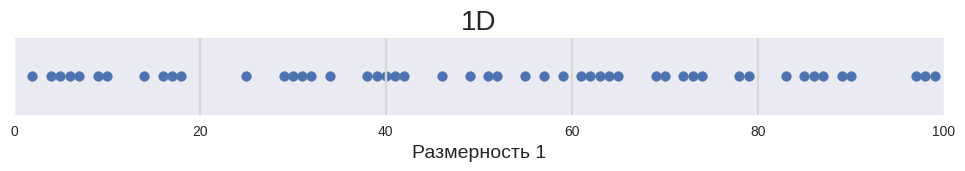

In [ ]:
x = np.random.choice(range(0,100), size=50, replace=False)
y = np.zeros_like(x)

plt.figure(figsize=(12, 1))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')

plt.xlim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("")
plt.yticks([], [])
plt.title("1D", fontsize=20);

Если нам нужно анализировать попадание случайной величины в каждый из пяти интервалов, у нас в среднем есть $\frac{50}{5} = 10$ наблюдений на одну ячейку. __Посмотрим на двумерный случай.__

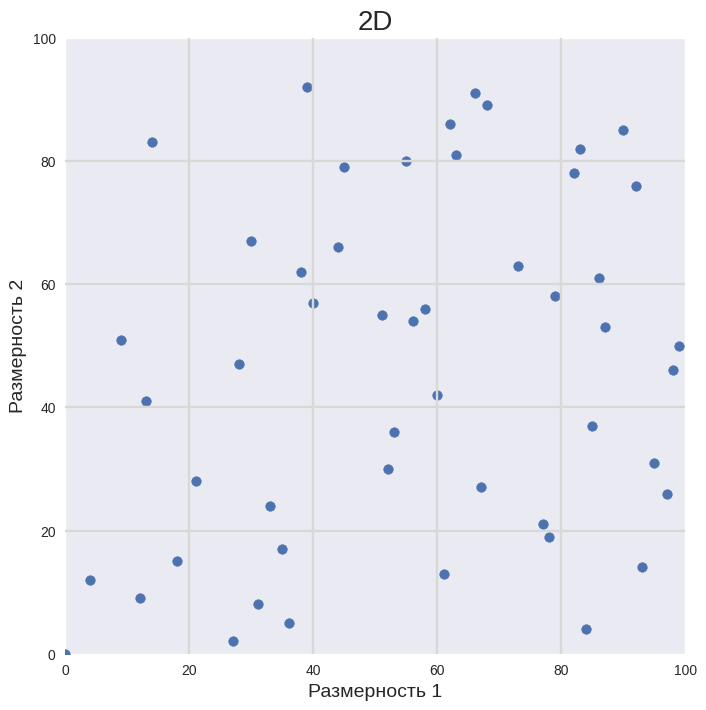

In [ ]:
x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)

plt.figure(figsize = (8, 8))
plt.scatter(x, y)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')

plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel("Размерность 1", fontsize=14)
plt.ylabel("Размерность 2", fontsize=14)
plt.title("2D", fontsize=20);

У нас есть по $5$ интервалов в каждом измерении. Теперь на каждую ячейку приходится в среднем $\frac{50}{5 \cdot 5} = 2$ точки. Начинают возникать ячейки, в которых нам не хватает данных для работы. __Посмотрим на трёхмерный случай.__

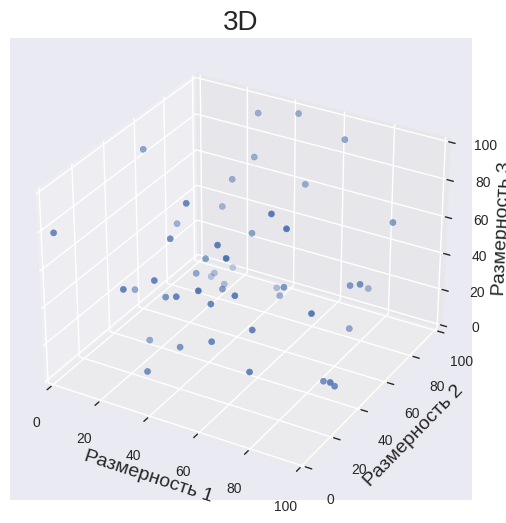

In [ ]:
from mpl_toolkits import mplot3d

x = np.random.choice(range(0,100), size=50, replace=False)
y = np.random.choice(range(0,100), size=50, replace=False)
z = np.random.choice(range(0,100), size=50, replace=False)

fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(x, y, z)

for grid_pt in [20, 40, 60, 80]:
    plt.axvline(x=grid_pt, color='#D8D8D8')
    plt.axhline(y=grid_pt, color='#D8D8D8')

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ax.set_xlabel("Размерность 1", fontsize=14)
ax.set_ylabel("Размерность 2", fontsize=14)
ax.set_zlabel("Размерность 3", fontsize=14)
plt.title("3D", fontsize=20);

Появляется ещё $5$ интервалов на третьем измерении. В среднем на каждую ячейку мы получаем $\frac{50}{5 \cdot 5 \cdot 5} = 0.4$ наблюдения.

__C каждой новой размерностью появляется новое пространство.__ Нам нужно заполнять его $\Rightarrow$ число симуляций, необходимых для устойчивых выводов экспоненциально увеличивается.

- Для размерности $1$ нам надо покрыть точками $5$ ячеек
- Для размерности $2$ нам надо покрыть точками уже $5^2$ ячеек
- Для размерности $3$ нам надо покрыть точками уже $5^3$ ячеек

Если мы сгенерируем для размерности $1$ $50$ точек, в среднем в каждой ячейке окажется по $10$. Для размерности $2$ для такого же результата нам уже понадобится $250$ точек. Для размерности $10$ нужно будет $97656250$ точек.

## 1.2 Вычисление числа $\pi$  

Попробуем с помощью генераций вычислить число $\pi$. Для начала найдём площадь окружности с радиусом $1$:

$$
x^2 + y^2 = 1.
$$

Можно поступить так: впишем окружность в квадрат $(0,0):(1,1)$, сгенерируем несколько точек в этом квадрате.

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
x**2 + y**2 > 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

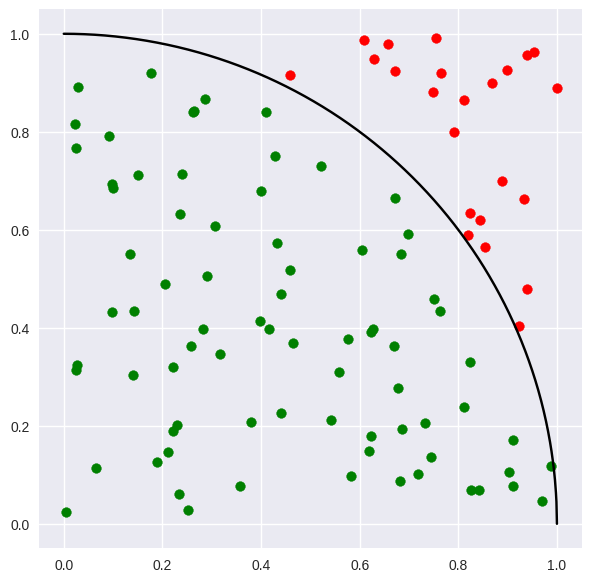

In [ ]:
n_obs = 100

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)

plt.figure(figsize=(7,7))

p = np.linspace(0, 1, 1000)
plt.plot(p, np.sqrt(1 - p**2), color='black')

usl = x**2 + y**2 > 1
plt.scatter(x[usl], y[usl], color='red')
plt.scatter(x[~usl], y[~usl], color='green');

Заметим, что только часть точек попала в окружность. Доля точек, лежащих внутри равна площади окружности. Чтобы точнее найти площадь, увеличим число генераций.

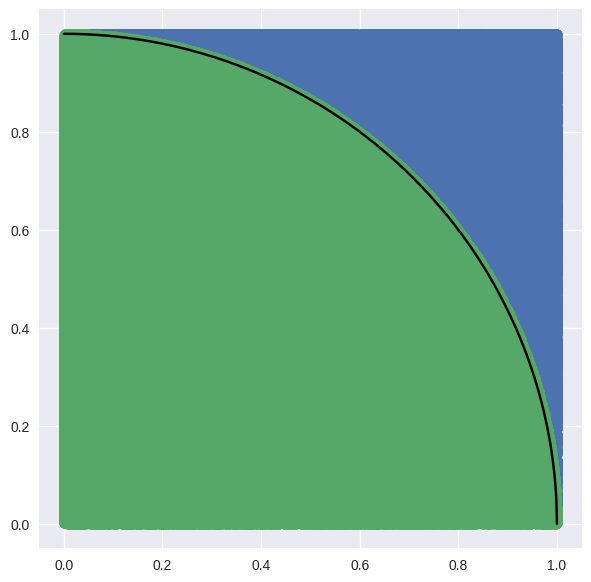

In [ ]:
n_obs = 10**6

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)

plt.figure(figsize=(7,7))

p = np.linspace(0, 1, 1000)
plt.plot(p, np.sqrt(1 - p**2), color='black')

usl = x**2 + y**2 > 1
plt.scatter(x[usl], y[usl])
plt.scatter(x[~usl], y[~usl]);

In [ ]:
np.mean(x**2 + y**2 <= 1) # вероятность попасть в четверть окружности (её площадь)

0.785817

$$S = \frac{1}{4} \cdot \pi R^2 \Rightarrow \pi = 4 \cdot S $$

In [ ]:
4*np.mean(x**2 + y**2 <= 1)

3.143268

In [ ]:
import math
math.pi

3.141592653589793

Получили число $\pi$. Чем больше симуляций мы сделаем, тем точнее оно будет.

Теперь попробуем получить его же, используя вместо окружности шар. Объём восьмой части шара можно посчитать по формуле:

$$ V = \frac{1}{8} \cdot \frac{4}{3} \cdot \pi \cdot R^3 \Rightarrow \pi = 8 \cdot \frac{3}{4} \cdot V $$

In [ ]:
n_obs = 10**6

x = np.random.uniform(0, 1, size=n_obs)
y = np.random.uniform(0, 1, size=n_obs)
z = np.random.uniform(0, 1, size=n_obs)

8 * 3/4 * np.mean(x**2 + y**2 + z**2 <= 1)

3.137856

Точность при том же числе генераций оказалась ниже. Теперь попробуем сделать то же самое, используя шар в $d$-мерном пространстве. Для его объёма можно получить формулу

$$
V = \frac{\pi^{\tfrac{d}{2}}}{\Gamma \left( \frac{d}{2}  + 1\right)} \cdot R^d,
$$

где $\Gamma(t)$ - гамма-функция. Она обобщает понятие факториала для непрерывного случая. Выразим число $\pi$

$$
\pi = \left(V \cdot \Gamma \left( \frac{d}{2} + 1 \right) \right)^\frac{2}{d}.
$$

In [ ]:
from scipy.special import gamma

def find_pi(ndim, n_obs = 10**6):

    # сгенерировали точки
    x = [np.random.uniform(0, 1, size=n_obs) for _ in range(ndim)]

    dist = np.zeros(n_obs) # считаем расстояние от начала координат до точки
    for item in x:
         dist += item**2

    V = np.sum(dist <= 1)/n_obs  # объём фигуры

    # 2**ndim из-за того, что мы всегда смотрим на кусочек фигуры (1/4 окружности, 1/8 шара и тд)
    pi = (2**ndim * V * gamma((ndim/2)+1))**(2/ndim)
    return pi

In [ ]:
find_pi(ndim=2)

3.142976

In [ ]:
find_pi(ndim=3)

3.1408135028850412

In [ ]:
find_pi(ndim=5)

3.1390440637047647

Попробуем посмотреть как мы будем приближаться к числу $\pi$ в зависимости от размерности пространства, в котором происходят симуляции.

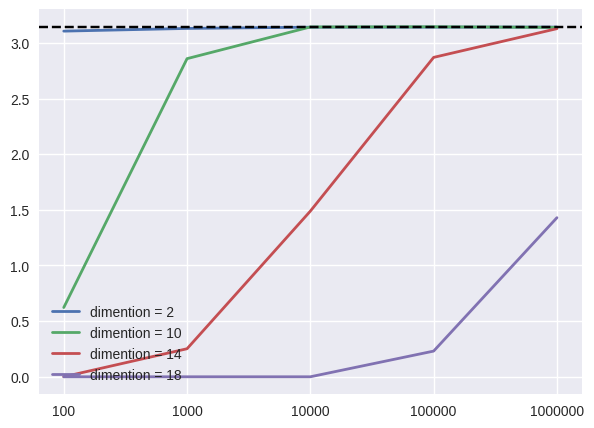

In [ ]:
plt.figure(figsize=(7,5))

n_sim = [10**i for i in range(2, 7)]
dim = [2, 10, 14, 18]

for d in dim:        # размерность
    cur_res = [ ]

    for n in n_sim:  # число симуляций
        pi = [ ]

        for _ in range(20):            # каждый эксперимент проводим 20 раз
            pi.append(find_pi(d, n))   # и усредняем результат

        cur_res.append(np.mean(pi))

    plt.plot(range(2, 7), cur_res, label=f'dimention = {d}', lw=2)

plt.axhline(y=np.pi, color='black', linestyle='--')
plt.xticks(np.arange(2, len(n_sim)+2), n_sim)
plt.legend(loc='lower left');

По оси $x$ отложено число симуляций, по оси $y$ приближение числа $\pi$. Каждая траектория - приближение числа $\pi$ при разных размерностях пространства для симуляций. __Для более высоких размерностей требуетмя на порядок больше точек, чтобы получить число $\pi$ с высокой точностью.__

### Резюме:

При работе с генерациями могут возникать проблемы:

- Сложности при генерации многомерных случайных величин (проклятье размерности)
- Сложности связанные с генерацией независимых случайных величин
- Сложности связанные со сходимостями последовательностей случайных величин не к тому распределению


# 2. Варка распределений (Квантильное преобразование)


### Упражнение (функция случайного аргумента)

$X \sim Exp(1)$

$f_X(t) = e^{-t}, t \ge 0$

$F_X(t) = 1 - e^{-t}, t \ge 0$

$Y = X^2$

$$
F_Y(y) = \mathbb{P}(Y \le y) = \mathbb{P}(X^2 \le y) = \mathbb{P}(X \le \sqrt{y}) = F_X(\sqrt{y}) = 1 - e^{-\sqrt{y}}, y \ge 0
$$

$$
f_Y(y) = F'_Y(y)
$$

$Z = 1 - e^{-X} \sim U[0;1]$

#### Теорема:

Пусть функция распределения $F_X(x)$ непрерывна. Тогда случайная величина $Y = F(X)$ имеет равномерное распределение на отрезке $[0; 1]$.

_Доказательство:_

$$X \sim F_X$$

$$Y = F_X(X) \sim ?$$

$$
F_Y(y) = \mathbb{P}(Y \le y) = \mathbb{P}(F_X(X) \le y) =
\mathbb{P}(X \le F_X^{-1}(y)) = F_X(F_X^{-1}(y)) = y
$$

$$
f_Y(y) = F'_Y(y) = 1, y \in [0;1]
$$

$$ Y \sim U[0;1] $$


#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.


#### Что это нам даёт:


- Позволяет генерировать из равномерного распределения другие

- Применимо невсегда, напрмер, для нормального распределения используют другие алгоритмы

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/matstat-AB/refs/heads/main/week05_LLN_CLT/image/quant.png" height="250">
</center>

Генерация случайностей это довольно сложное занятие. Равномерная случайная величина одна из самых приятных в плане генерации. Обычно алгоритмы генерации создают именно для неё, так как с более сложными распределениями возникают проблемы.  Квантильное преобразование позволяет нам расширить навыки компьютера и переработать равномерную случайную величину в необходимое нам распределение.

## Упражнение

Сварить из равномерной случайной величины $U[0; 1]$  экспоненциальную величину, $Exp(\alpha)$.

__Решение:__

Из теории вероятностей мы знаем, что у экспоненциальной случайной величины функция распределения выглядит так:

$$
F_X(x) = 1 - e^{-\alpha x}.
$$

Найдём обратную функцию:

$$
F_X^{-1}(y) = -\frac{1}{\alpha} \ln(1-y).
$$

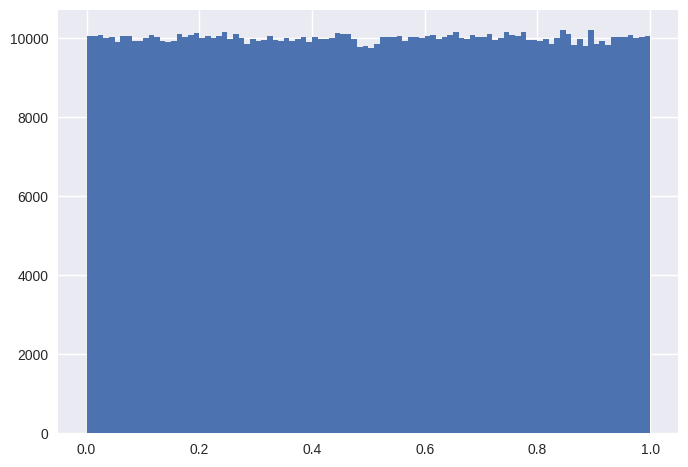

In [ ]:
import scipy.stats as sts

uniform_rv = sts.uniform(0, 1)

n_obs = 10**6
y = uniform_rv.rvs(n_obs)

plt.hist(y, bins=100);

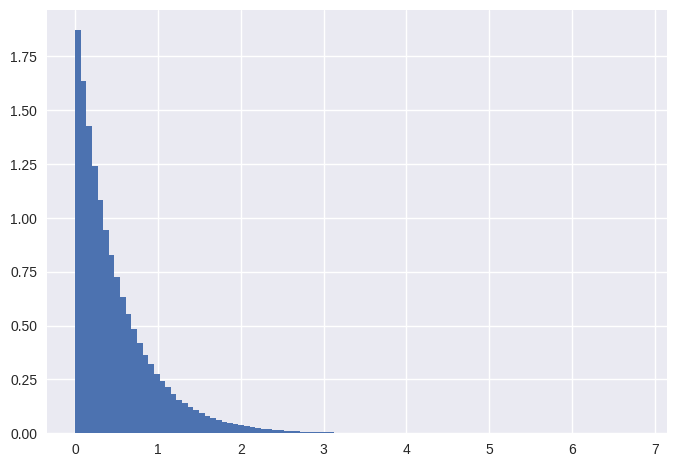

In [ ]:
x = -0.5*np.log(1 - y) # Exp(2)
plt.hist(x, density = True, bins = 100);

In [ ]:
np.mean(x)

0.4999997421677162

Теперь попробуем в обратную сторону.

In [ ]:
exponential_rv = sts.expon(scale=0.5)

n_obs = 10**6
x = exponential_rv.rvs(n_obs)
x.size

1000000

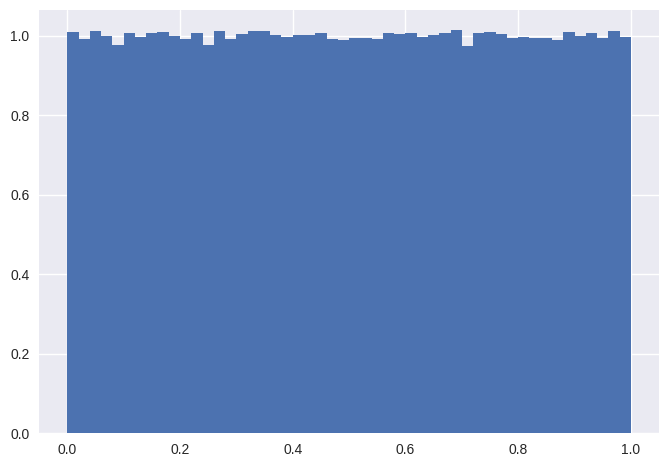

In [ ]:
y = 1 - np.exp(-2*x)

plt.hist(y, density = True, bins = 50);

## Упражнение

Давайте попробуем получить случайную величину со следующей функцией распределения:

$$
F(x) = \begin{cases} 0, x < 0 \\ x^7, x \in [0,1] \\ 1, x > 1 \end{cases}
$$

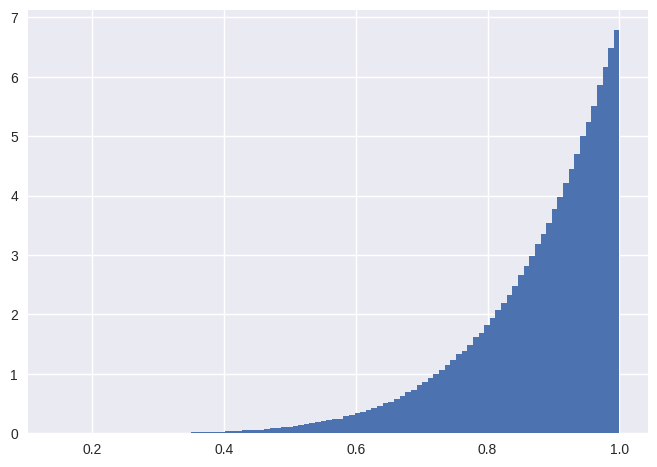

In [ ]:
y = sts.uniform(0,1).rvs(10**6)
x = y**(1/7)

plt.hist(x, bins=100, density = True);

Работать такая схема будет не всегда. Например, её никогда не используют для нормального распределения. Проблема в том, что подсчет обратной функции распределения для него аналитически невозможен, так как интеграл


$$
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{(t-\mu)^2}{2 \sigma^2}} dt
$$

не берётся. Немного подробнее про разные генераторы случайных чисел можно [почитать на хабре.](https://habrahabr.ru/post/263993/)

# 3. про удачу и нашу жизнь

Задача была вдохновлена [вот этим видео.](https://www.youtube.com/watch?v=3LopI4YeC4I)

Люди часто недооценивают роль случайности в своей жизни. Им кажется, что если они прокачают свои навыки и отдадутся полностью работе, они обязательно достигнут успеха. Люди забывают, что удача тоже важна. Иногда слишком.

Пусть у нас в выборке есть $10000$ кандидатов в космонавты. Из них только $10$ человек пройдут все испытания и приступят к тренировкам. Отбор в космонавты на $95\%$ зависит от навыков кандидата и на $5\%$ от его удачливости. Навыки и удачливость не зависят друг от друга.

__а) [5 баллов]__  Сгенерируйте навык каждого кандидата из равномерного распределения на отрезке $[0; 1]$. По аналогии сгенирируйте удачливость каждого кандидата. Итоговую величину, по которой будет производиться отбор в космонавты, рассчитайте по формуле:

$$
\text{score} = 0.95 \cdot \text{skill} + 0.05 \cdot \text{luck}.
$$

Повторите эту симуляцию $10^4$ раз. Оцените среднее значение удачливости тех, кто стал космонавтом. Постройте гистограмму для распределения удачи среди тех, кто стал космонавтом.

**Hint:** обратите внимание на функцию `np.argpartition`. Она поможет вам сделать код проще. Также обратите внимание, что в пунктах б) и в) нужно переиспользовать результаты симуляций из пункта а). Иначе код будет работать слишком долго.

In [ ]:
n_obs = 10**4
n_ppl = 10**4

uniform_rv = sts.uniform(0,1)

skill = uniform_rv.rvs((n_obs, n_ppl))
luck = uniform_rv.rvs((n_obs, n_ppl))

score = 0.95*skill + 0.05*luck

In [ ]:
x = np.array([10, 4, 5, -3, 1, 9, 8])
x[np.argpartition(x, -3)[-3:]]

array([ 8,  9, 10])

In [ ]:
np.argpartition(score[1,:], -10)[-10:]

array([8413, 3614, 3556, 8542, 9242, 8334, 7783, 7243,  817,  468])

In [ ]:
score[1, :][np.argpartition(score[1,:], -10)[-10:]]

array([0.99011696, 0.99386969, 0.99069398, 0.99367096, 0.9935963 ,
       0.99138237, 0.99112852, 0.99403993, 0.99239179, 0.99264712])

In [ ]:
score[1, :][1237]

0.08581347717874226

In [ ]:
score[1, :].max()

0.9940399325393957

In [ ]:
ans = []
ans2 = []
for i in range(n_obs):
    ind = np.argpartition(score[i,:], -10)[-10:]
    ans.extend(list(luck[i][ind]))

    ans2.extend(list(skill[i][ind]))

In [ ]:
np.mean(ans)

0.932792764027099

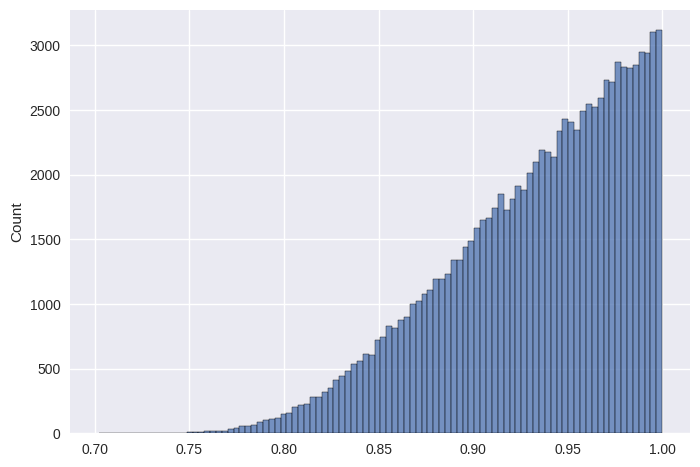

In [ ]:
sns.histplot(ans);

In [ ]:
np.mean(ans2)

0.9964672732086414

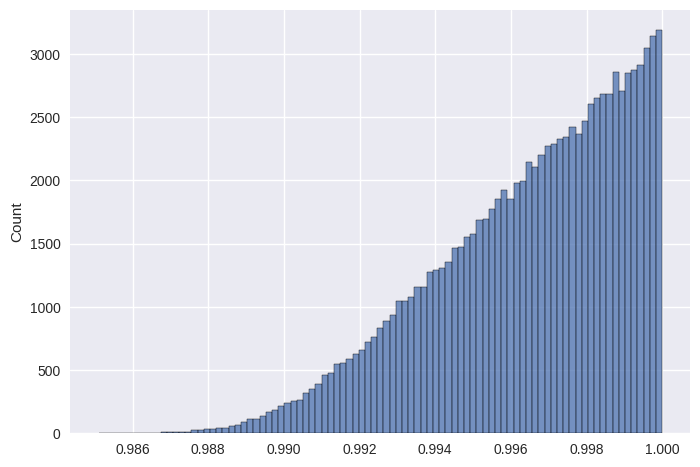

In [ ]:
sns.histplot(ans2);

__б) [5 баллов]__  Отберите космонавтов по навыкам, `skill`. Оцените с помощью симуляций, на сколько в среднем человек топ кандидатов по `skill` пересекается с топом по `score`.

In [ ]:
ans = [ ]
for i in range(n_obs):
    ind_score = np.argpartition(score[i,:], -10)[-10:]
    ind_skill = np.argpartition(skill[i,:], -10)[-10:]
    ans.append(len(set(ind_score) & set(ind_skill))/10)

1 - np.mean(ans)

0.8163499999999999

__в) [5 баллов]__ А что будет, если мы будем отбирать больше космонавтов?

Для каждого $n$ от $10$ до $500$ с шагом в $10$ сделайте процедуру отбора в космонавты топ-$n$ кандидатов по `skill` и по `score`. Посчитайте, на сколько в среднем процентов отличаются эти топы. Изобразите получившуюсья зависимость на графике. По оси абсцисс отложите $n$, по оси ординат процент пересечения.

In [ ]:
top = list(range(10, 510, 10))
int_pct = []

for n in top:
    ans = [ ]
    for i in range(n_obs):
        ind_score = np.argpartition(score[i,:], -n)[-n:]
        ind_skill = np.argpartition(skill[i,:], -n)[-n:]
        ans.append(len(set(ind_score) & set(ind_skill))/n)
    int_pct.append(1 - np.mean(ans))

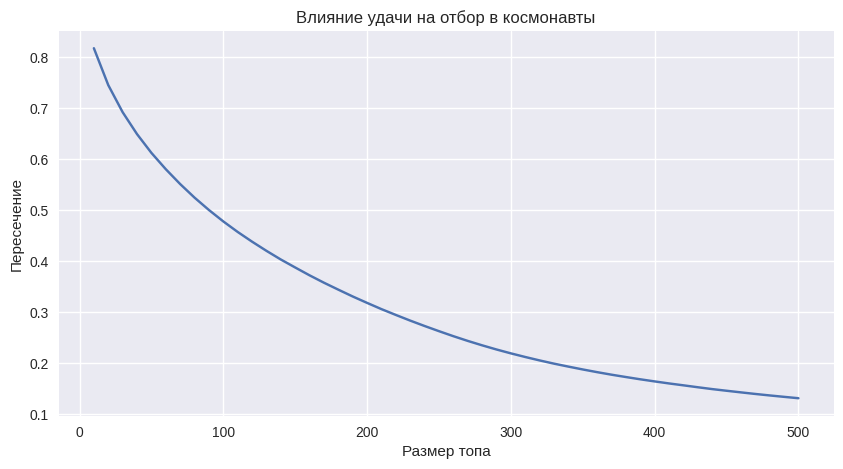

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(top, int_pct)
plt.title('Влияние удачи на отбор в космонавты')
plt.xlabel('Размер топа')
plt.ylabel('Пересечение');

__г) [5 баллов]__ Сделайте выводы из проделанных рассчётов.

Парадокс заключается в том, что не смотря на свою маленькую долю в общем учёте, удача у всех прошедших в космонавты близка к единице. Складывается впечатление, что удача является решающим фактором, однако это не совсем так. Просто score и luck коррелируют между собой. Кажется, что среднее значение удачи в 0.932 это очень много, пока не узнаёшь, что среднее значение по skill - 0.996, то есть, всё же, скилл важнее примерно в 19 раз (что логично, потому что 95% = 5% * 19).

В общем, влияние удачи скорее обусловлено эффектом бабочки. Если из 10000 человек проходят только 10, то это всего 0.1% от общего числа, а значит малейшее изменение в параметрах может сильно изменить итоговый топ. Эту мысль поддерживает и ответ в пункте В). Когда настройка системы становиться не такой тонкой, то маленькие изменения уже не могут внести весомый вклад.

> Повод ли это грустить? Конечно же, нет. Если вы попытались схватиться за одну из возможностей и у вас ничего не вышло, забудьте об этом. Не впадайте в депрессию, продолжайте пытаться. В мире есть столько возможностей, которые можно упустить. Обидно будет, если вы не попробуете ещё. Рано или поздно удача вам улыбнётся ❤️❤️❤️

Давайте попробуем понять, когда именно она вам улыбнётся.

__д) [4 балла]__ Юра хочет стать космонавтом. У него довольно хорошо развиты навыки. Юра входит в $1\%$ лучших, его `score = 0.99` (Юра прокачал свои навыки до 0.99 и вообще не полагается на удачу). С какой вероятностью Юра станет космонавтом?

In [ ]:
# Вообще это чушь, тут надо быть со скилом 1 и вкаченной удачей  0.95 + 0.05*0.8
# Но как переделать чтобы тут было норм число я хз, поэтому пусть остаётся

ans =[ ]
for i in range(n_obs):
    ind_score = np.argpartition(score[i,:], -10)[-10:]
    ans.append(np.any(0.99 > score[i][ind_score]))

np.mean(ans)

0.3871


__е) [1 балл]__ Юра пытается снова и снова. Сколько в среднем попыток ему надо сделать до первого успеха?

__Hint:__ тут не нужно ничего симулировать. Надо вспомнить про геометрическое распределение и его математическое ожидание.

In [ ]:
1/0.4

2.5

In [ ]:
# Проделайте пункты д) и е) с наличием удачи :)

In [ ]:
# Какой минимальный скилл вы должны набрать, если вы хотите стать космонавтом с вероятностью более 0.1?